## GPD model example
---

Example showing how to create a GPD model, load pretrained weights from the SeisBench repository and annotate a waveform.

**Current version of the model API is incomplete and subject to change.**

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('./', os.pardir)))

In [2]:
import numpy as np
import torch
import obspy

from seisbench.models import GPD, WaveformModel

### Build a GPD model from scratch or using pretrained waveforms from the SeisBench remote repository

In [3]:
model = GPD()

In [4]:
model = GPD.from_pretrained("dummy")

In [5]:
model.weights_docstring

'Randomly initialized model without any training. Just for debug purpose.\n\nJannes Münchmeyer (munchmej@gfz-potsdam.de)'

### Annotate obspy example waveform and visualize predictions

In [6]:
stream = obspy.read()

In [7]:
annotations = model.annotate(stream)

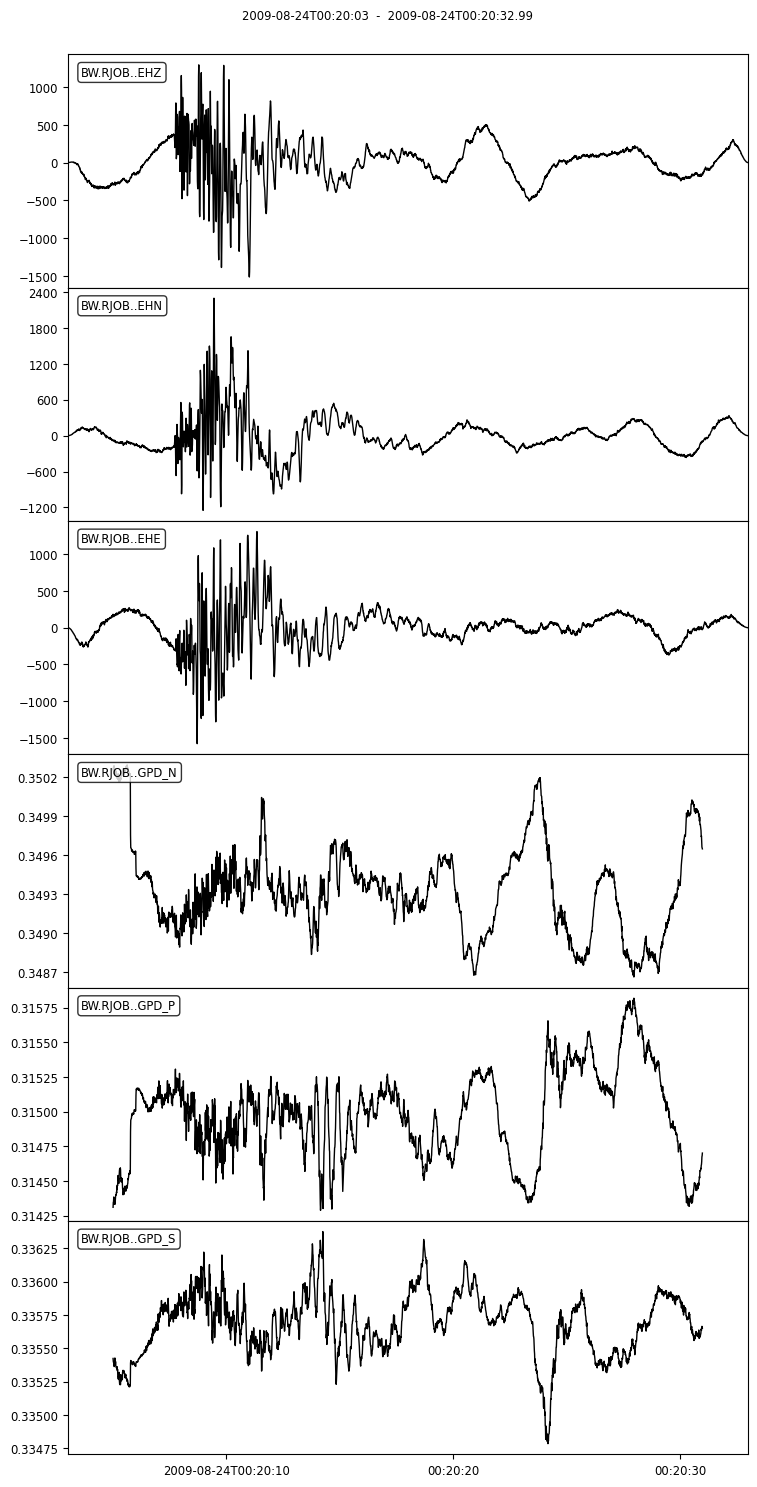

In [8]:
(stream + annotations).plot(equal_scale=False);

### Download waveforms through FDSN and annotate

In [9]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [10]:
client = Client("GFZ")

t = UTCDateTime("2014/04/02")

stream = client.get_waveforms(network="CX", station="PB01", location="*", channel="HH?", starttime=t, endtime=t+120)
stream += client.get_waveforms(network="CX", station="PB02", location="*", channel="HH?", starttime=t, endtime=t+120)

In [11]:
annotations = model.annotate(stream, prediction_rate=10)

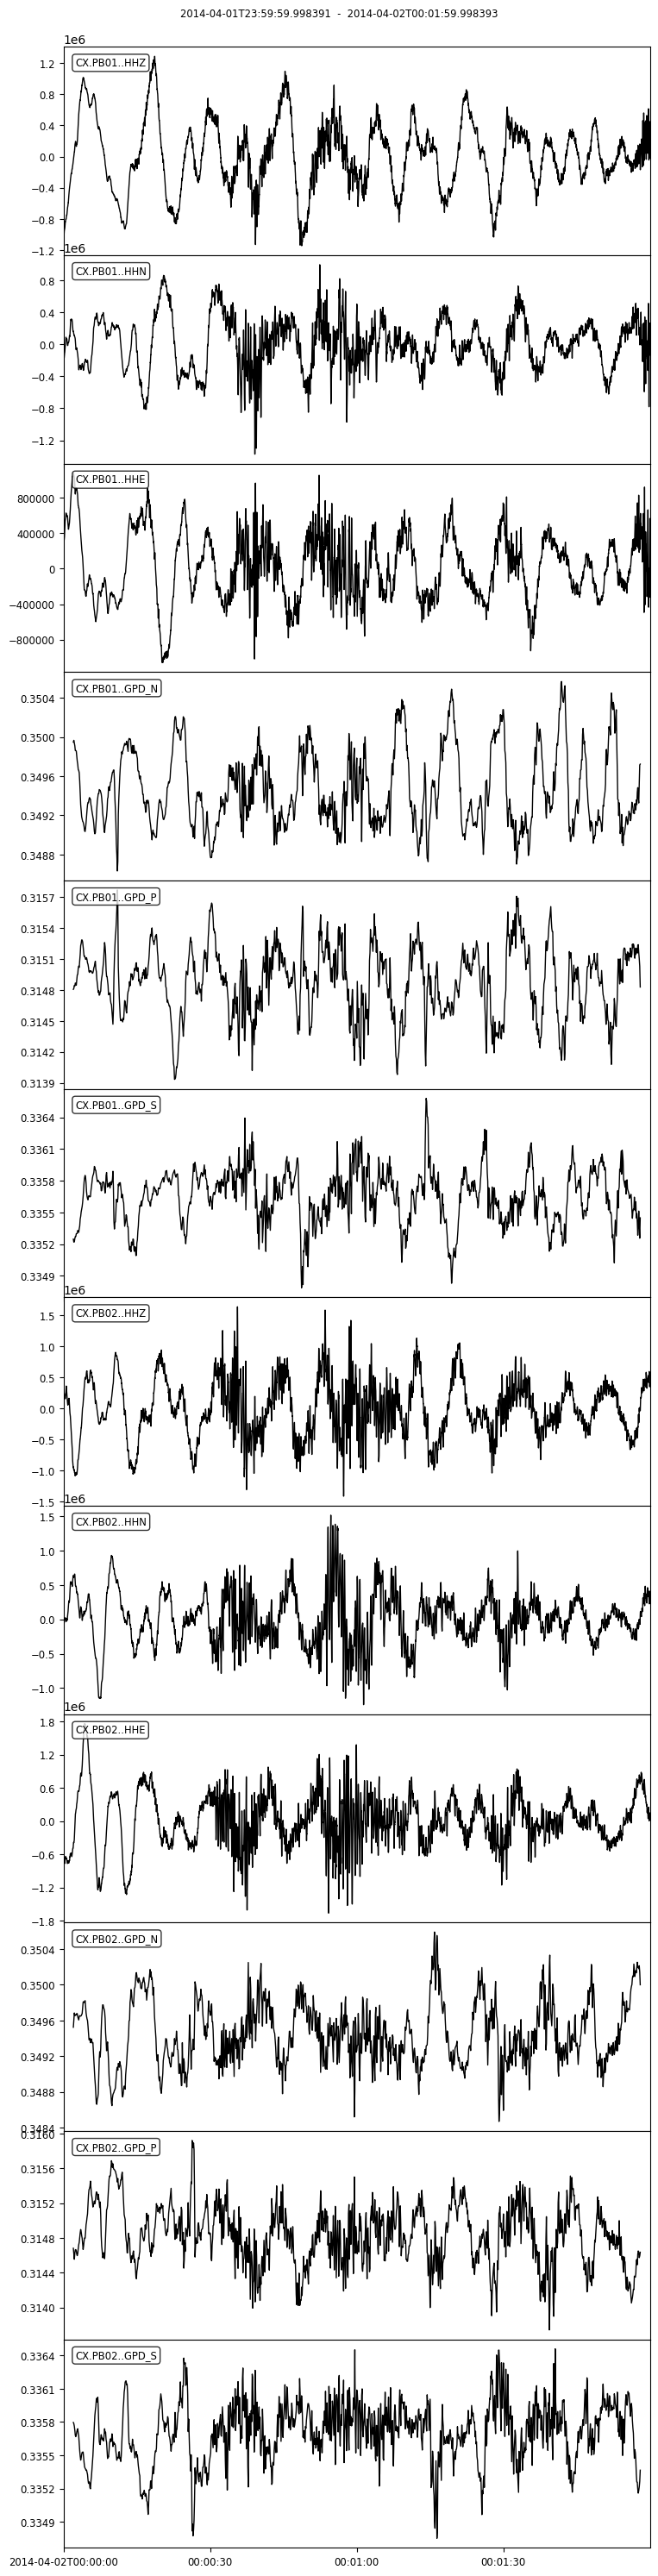

In [12]:
(stream + annotations).plot(equal_scale=False);